In [44]:
import pandas as pd
import numpy as np
import utils
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
import utils 
from utils import generate_submission_file, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pandas as pd 
import numpy as np 
import statsmodels.api as sm  # <--- Yay! API! 
%matplotlib inline 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 5)
from statsmodels.tsa.statespace.sarimax import SARIMAX

import itertools

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)   
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [3]:
data = pd.read_csv('data/data.csv')

In [4]:
data['date'] = pd.to_datetime(data['date'])

In [5]:
data = data.set_index('date')
data = data.sort_index()

In [6]:
area_1_raw = data[data.variable == 'area_1'].drop('variable', axis = 1).sort_index()
area_2_raw = data[data.variable == 'area_2'].drop('variable', axis = 1).sort_index()
area_3_raw = data[data.variable == 'area_3'].drop('variable', axis = 1).sort_index()

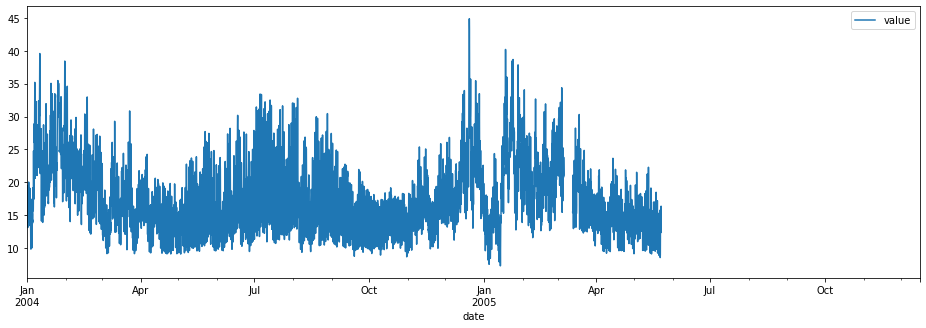

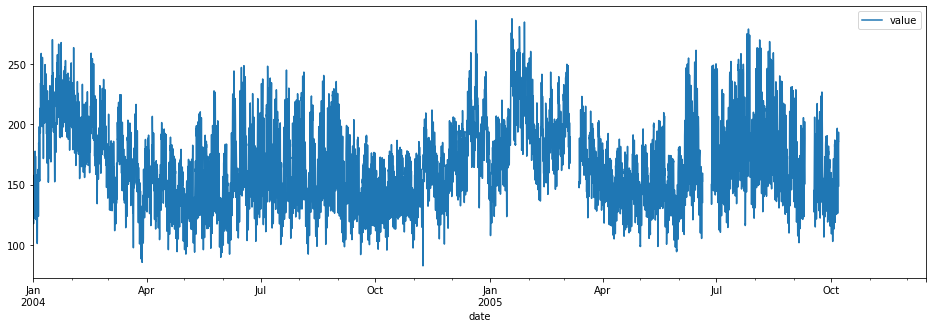

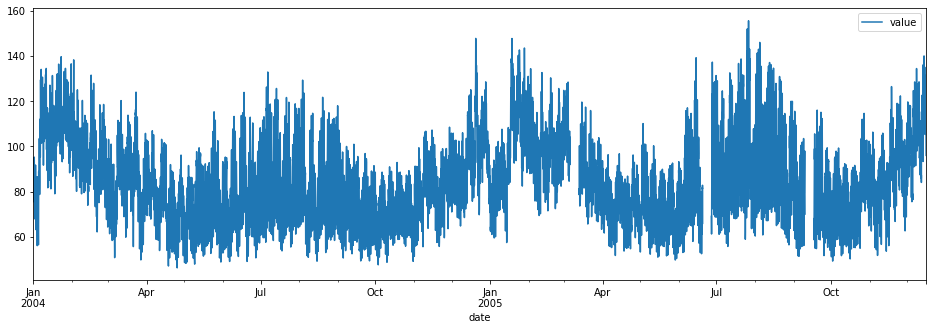

In [8]:
area_1_raw.plot()
area_2_raw.plot()
area_3_raw.plot()

plt.rcParams['figure.figsize'] = (6, 4)

In [9]:
area_1 = area_1_raw.dropna()
area_2 = area_2_raw.dropna()
area_3 = area_3_raw.dropna()

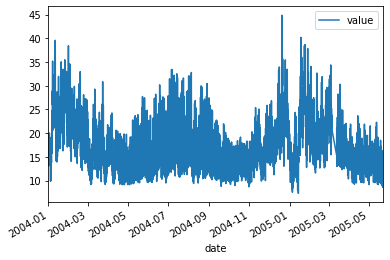

In [20]:
area_1.plot()

plt.rcParams['figure.figsize'] = (6, 4)

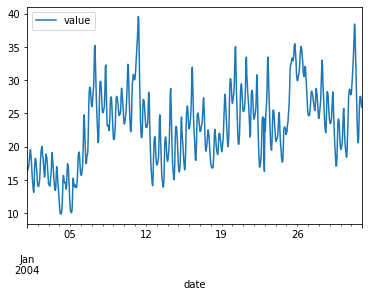

In [22]:
area_1['Jan 2004'].plot()

In [10]:
area_1 = (area_1.ffill()+ area_1.bfill())/2
area_2 = (area_2.ffill()+ area_2.bfill())/2
area_3 = (area_3.ffill()+ area_3.bfill())/2

In [27]:
area_1_log = np.log(area_1)
area_2_log = np.log(area_2)
area_3_log = np.log(area_3)

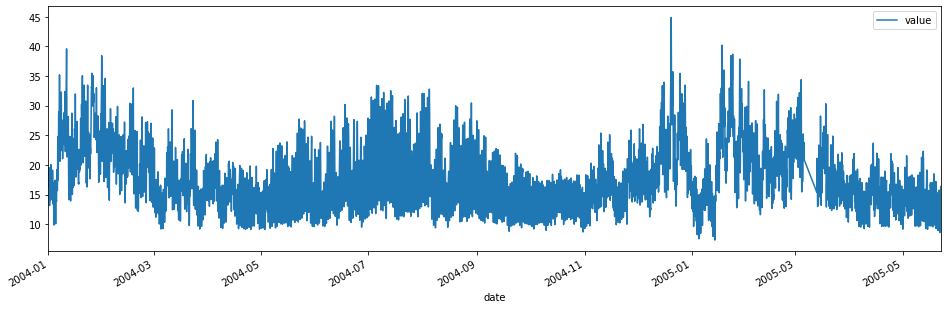

In [29]:
area_1.plot(figsize=(16, 5))

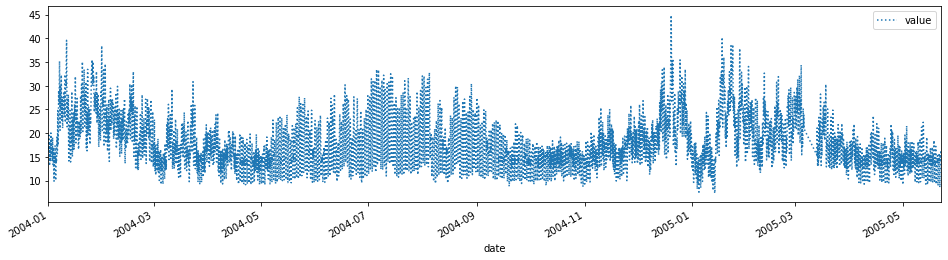

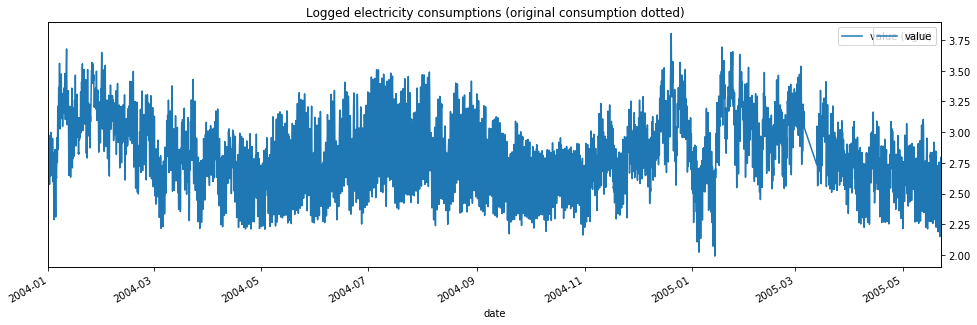

In [30]:
area_1.plot(legend='Original', ls=':')
area_1_log.plot(figsize=(16, 5), secondary_y=True)
plt.title('Logged electricity consumptions (original consumption dotted)')
plt.legend()
plt.show()

In [42]:
# Perform Dickey-Fuller test:
adfstat_1, pvalue_1, usedlag_1, nobs_1, critvalues_1, icbest_1 = adfuller(train_1.dropna().value)
adfstat_2, pvalue_2, usedlag_2, nobs_2, critvalues_2, icbest_2 = adfuller(train_2.dropna().value)
adfstat_3, pvalue_3, usedlag_3, nobs_3, critvalues_3, icbest_3 = adfuller(train_3.dropna().value)

pvalue_1, pvalue_2, pvalue_3

(5.327197886473817e-09, 1.5261847068827382e-12, 7.652243482634388e-12)

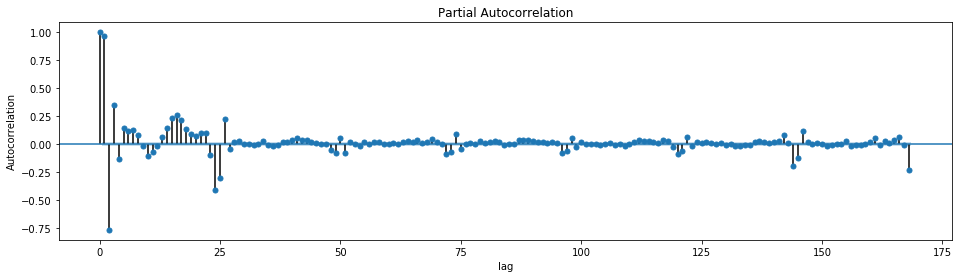

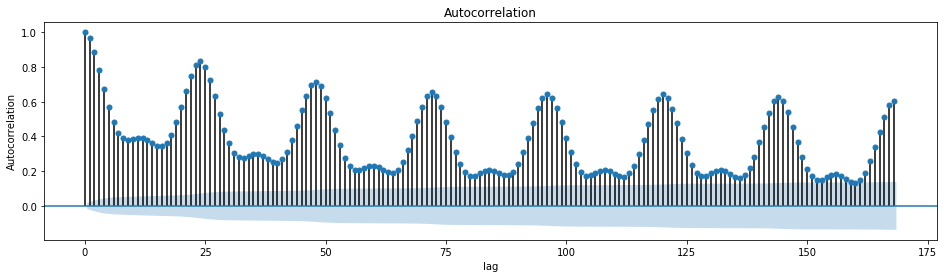

In [49]:
plot_pacf(train_1.dropna(), alpha=.05, lags=168)  
plt.xlabel('lag')
plt.ylabel('Autocorrelation')
plt.show()

plot_acf(train_1.dropna(), alpha=.05, lags=168)  
plt.xlabel('lag')
plt.ylabel('Autocorrelation')
plt.show()

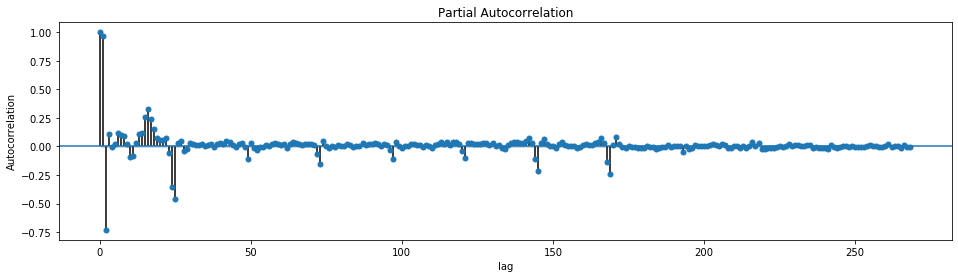

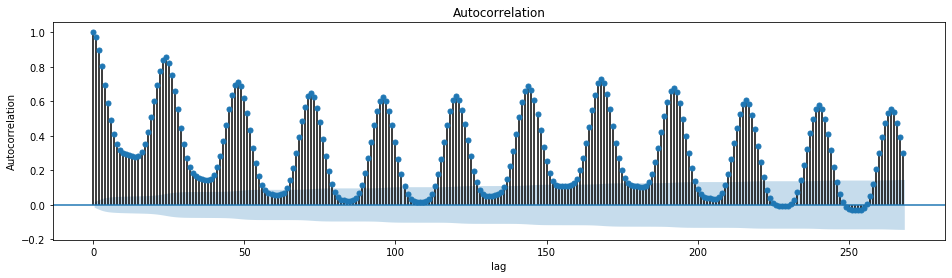

In [50]:
plot_pacf(train_2.dropna(), alpha=.05, lags=268)  
plt.xlabel('lag')
plt.ylabel('Autocorrelation')
plt.show()

plot_acf(train_2.dropna(), alpha=.05, lags=268)  
plt.xlabel('lag')
plt.ylabel('Autocorrelation')
plt.show()

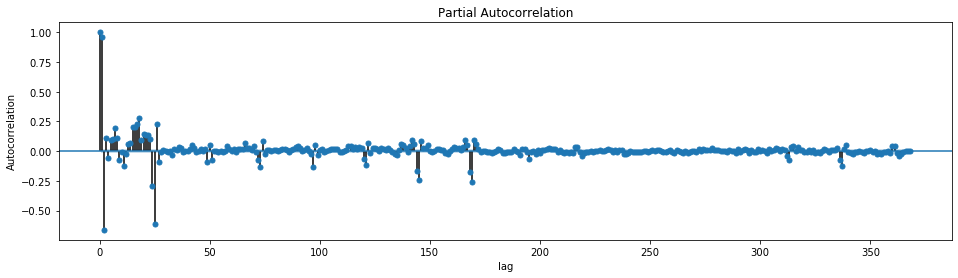

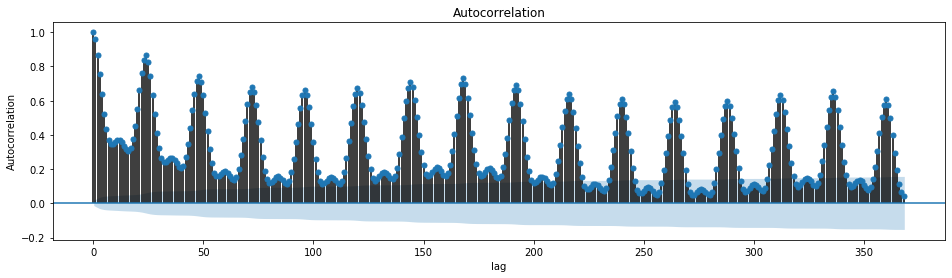

In [51]:
plot_pacf(train_3.dropna(), alpha=.05, lags=368)  
plt.xlabel('lag')
plt.ylabel('Autocorrelation')
plt.show()

plot_acf(train_3.dropna(), alpha=.05, lags=368)  
plt.xlabel('lag')
plt.ylabel('Autocorrelation')
plt.show()

In [52]:
train_1 = area_1[:-168]
train_2 = area_2[:-168]
train_3 = area_3[:-168]

test_1 = area_1[-168:]
test_2 = area_2[-168:]
test_3 = area_3[-168:]

In [81]:
#Area 1
mae_1 = sm.tsa.statespace.SARIMAX(train_1,
                                  order=(1, 0, 1),
                                  seasonal_order=(1, 0, 1, 24))

results_1 = mae_1.fit()
predictions_mae_model_1 = results_1.get_forecast(steps=168)
predicted_mean_1 = predictions_mae_model_1.predicted_mean

In [54]:
#Area 2
mae_1 = sm.tsa.statespace.SARIMAX(train_2,
                                  order=(1, 0, 1),
                                  seasonal_order=(1, 0, 1, 24))

results_2 = mae_1.fit()
predictions_mae_model_2 = results_2.get_forecast(steps=168)
predicted_mean_2 = predictions_mae_model_2.predicted_mean

In [55]:
#Area 3
mae_3 = sm.tsa.statespace.SARIMAX(train_3,
                                  order=(1, 0, 1),
                                  seasonal_order=(1, 0, 1, 24))

results_3 = mae_3.fit()
predictions_mae_model_3 = results_3.get_forecast(steps=168)
predicted_mean_3 = predictions_mae_model_3.predicted_mean

In [56]:
mape_1 = mean_absolute_percentage_error(test_1, predicted_mean_1)
mape_2 = mean_absolute_percentage_error(test_2, predicted_mean_2)
mape_3 = mean_absolute_percentage_error(test_3, predicted_mean_3)

In [57]:
print(mape_1)
print(mape_2)
print(mape_3)

20.163536141555127
18.60877698518572
11.079976514945281


In [74]:
prediction_1 = pd.DataFrame(predicted_mean_1.values,index=pd.date_range(start='23/05/2005', end='30/05/2005', freq='h')[:-1])

In [69]:
predicted_mean_3.index

RangeIndex(start=16656, stop=16824, step=1)

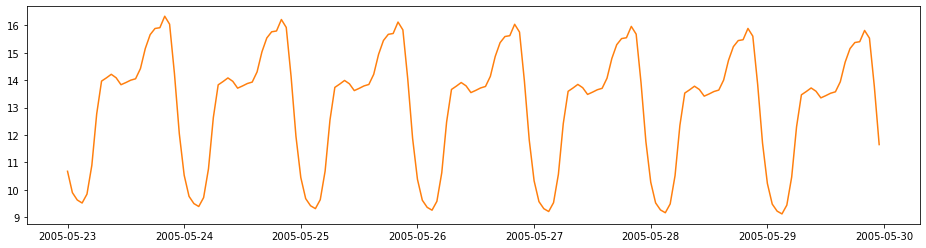

In [82]:
plt.plot(test_1, label='original')
plt.plot(prediction_1[0], label='arima')
plt.show();

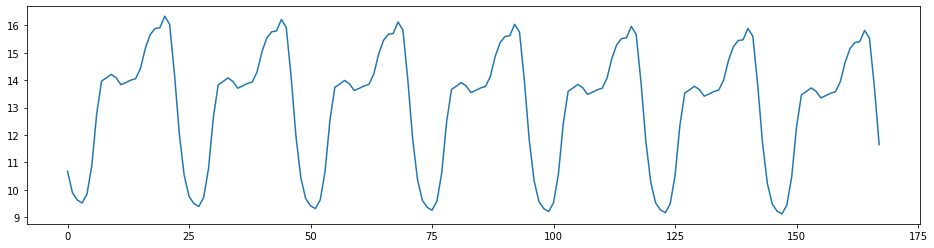

In [65]:
plt.plot(predicted_mean_1.values, label='arima')

In [61]:
plt.plot(area_1, label='original')
plt.plot(predicted_mean_1, label='arima')
plt.show();

ValueError: view limit minimum -23979.247916666667 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [60]:
plt.plot(area_1, label='original')
plt.plot((predicted_mean_1), label='arima')
plt.show();

ValueError: view limit minimum -23979.247916666667 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [58]:
plt.plot(area_1, label='original')
plt.plot(predicted_mean_1), label='arima')
plt.show();

plt.plot(area_2, label='original')
plt.plot(predicted_mean_2), label='arima')
plt.show();

plt.plot(area_3, label='original')
plt.plot(predicted_mean_3), label='arima')
plt.show();

SyntaxError: invalid syntax (<ipython-input-58-b2154bdb114a>, line 2)

In [17]:
generate_submission_file(predicted_mean_1.values, predicted_mean_2.values, predicted_mean_3.values)

,value
date,
2005-05-23 00:00:00,10.676512
2005-05-23 01:00:00,9.897436
2005-05-23 02:00:00,9.629338
2005-05-23 03:00:00,9.519089
2005-05-23 04:00:00,9.842984
2005-05-23 05:00:00,10.892980
2005-05-23 06:00:00,12.769125
2005-05-23 07:00:00,13.966888
2005-05-23 08:00:00,14.085193


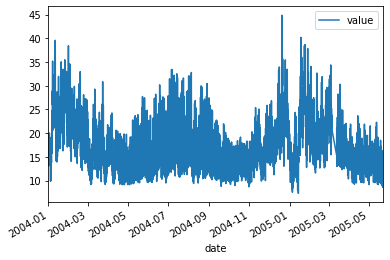

In [26]:
area_1.plot()
plt.rcParams['figure.figsize'] = [16,4]

In [ ]:

plt.rcParams['figure.figsize'] = [16,4]
plt.plot(df_Sales.Date, df_Sales.Weekly_Sales)
plt.show()